# Non-Negativ Matrix Factorization Model on 1-gram Tokens

In [1]:
import warnings
warnings.simplefilter('ignore')
from pathlib import Path
import sys
sys.path.append(str(Path.cwd().parent))
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pyLDAvis
import pyLDAvis.sklearn
import seaborn as sns
from src.models.build_topic_model import show_topics, drop_topics

C:\Users\poorj\Projects\CCC-Topic-Modeling\env\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


### Load dataset

In [2]:
path_to_data = Path('../data')
df = pd.read_csv(path_to_data / 'processed' /'tokenized1gram_data.csv', converters={'tokenized': eval, 'tokenized_mults': eval, 'tokenized_mults_extr': eval})

### Fit model for full token set (incl. extra stops)

In [3]:
tfidf = TfidfVectorizer(analyzer='word', tokenizer=lambda doc: doc, preprocessor = lambda doc: doc, token_pattern=None)
dtm_tfidf = tfidf.fit_transform(df['tokenized_mults'])
vocab = np.array(tfidf.get_feature_names())

nmf_tfidf = NMF(init='random', n_components=6, max_iter=100, random_state = 0)
nmf_tfidf.fit(dtm_tfidf)

pyLDAvis.enable_notebook()
vis_nmf = pyLDAvis.sklearn.prepare(nmf_tfidf, dtm_tfidf, tfidf)
vis_nmf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.076174  0.027879       1        1  22.047664
2     -0.038425  0.063448       2        1  19.961473
1      0.083982 -0.138478       3        1  16.997011
0      0.007428 -0.126556       4        1  14.847283
5     -0.262575  0.025989       5        1  13.833141
4      0.133417  0.147718       6        1  12.313428, topic_info=            Term       Freq      Total Category  logprob  loglift
666        csekk  45.000000  45.000000  Default  30.0000  30.0000
1911  hozzájárul  26.000000  26.000000  Default  29.0000  29.0000
350         bank  21.000000  21.000000  Default  28.0000  28.0000
1976       hónap  31.000000  31.000000  Default  27.0000  27.0000
101      ajánlat  22.000000  22.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
818          díj   5.471199  34.887808   Topic6  -5.3577   0.2418
859          egy   4.146780  15.909119   Topic6  -5.6349   0.7499
1868      hogyha   4.361398  24.994683   Topic6  -5.5844   0.3486
3422        mond   4.584513  37.680117   Topic6  -5.5345  -0.0120
47            ad   4.421930  32.039762   Topic6  -5.5707   0.1141

[541 rows x 6 columns], token_table=      Topic      Freq              Term
term                                   
2         2  1.321172             157es
47        1  0.124845                ad
47        2  0.218479                ad
47        3  0.187267                ad
47        4  0.093634                ad
...     ...       ...               ...
5486      1  0.922071            ügyfél
5486      3  0.061471            ügyfél
5490      5  1.039443      ügyfélprofil
5492      2  0.683806  ügyfélszolgálati
5498      5  1.000605            ügynök

[740 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 6, 5])

In [4]:
W1 = nmf_tfidf.fit_transform(dtm_tfidf)
H1 = nmf_tfidf.components_

show_topics(H1, num_top_words = 8, vocab = vocab)

['díj ugye évforduló biztosítás éves ft szerződés fizet',
 'csekk küld fizet tud befizet kap hónap hó',
 'tud cím email jelszó küld felület ön online',
 'tud szia utal mond szerződés ügyfél összeg lát',
 'bank hónap csoportos megbízás levon tud von terhelés',
 'hozzájárul ajánlat adat köszön elérhetőség szerződés megkeres akció']

### Fit model for cleaned token set (excl. extra stops)

In [3]:
tfidf = TfidfVectorizer(analyzer='word', tokenizer=lambda doc: doc, preprocessor = lambda doc: doc, token_pattern=None)
dtm_tfidf = tfidf.fit_transform(df['tokenized_mults_extr'])
vocab = np.array(tfidf.get_feature_names())

nmf_tfidf = NMF(init='random', n_components=9, max_iter=100, random_state = 0)
nmf_tfidf.fit(dtm_tfidf)

pyLDAvis.enable_notebook()
vis_nmf = pyLDAvis.sklearn.prepare(nmf_tfidf, dtm_tfidf, tfidf)
vis_nmf

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.073100  0.124678       1        1  14.353668
6     -0.038843  0.054176       2        1  13.936558
1      0.128012  0.073176       3        1  11.639093
0      0.000950 -0.017715       4        1  11.156764
5      0.289461 -0.068487       5        1  10.846879
2     -0.061536 -0.169451       6        1  10.705658
4     -0.054631 -0.098834       7        1  10.165071
7     -0.149944 -0.091272       8        1   9.110909
3     -0.040369  0.193728       9        1   8.085400, topic_info=            Term       Freq      Total Category  logprob  loglift
654        csekk  41.000000  41.000000  Default  30.0000  30.0000
1877  hozzájárul  25.000000  25.000000  Default  29.0000  29.0000
1937          hó  36.000000  36.000000  Default  28.0000  28.0000
339         bank  19.000000  19.000000  Default  27.0000  27.0000
2151      jelszó  21.000000  21.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
526    biztosító   2.620505  11.001429   Topic9  -5.5576   1.0805
47            ad   3.069658  31.977996   Topic9  -5.3994   0.1716
4710        utal   2.982047  31.157208   Topic9  -5.4284   0.1687
317    azonosító   2.744167  20.212473   Topic9  -5.5115   0.5183
2726   következő   2.433410  27.179859   Topic9  -5.6317   0.1019

[669 rows x 6 columns], token_table=      Topic      Freq             Term
term                                  
2         3  1.393712            157es
17        6  1.809885            2rend
23        8  1.570180               6c
47        1  0.062543               ad
47        2  0.250172               ad
...     ...       ...              ...
5359      8  0.114791           ügyfél
5363      5  0.983098     ügyfélprofil
5364      3  0.482612  ügyfélszolgálat
5364      7  0.321741  ügyfélszolgálat
5371      5  0.961054           ügynök

[1075 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 2, 1, 6, 3, 5, 8, 4])

In [4]:
W1 = nmf_tfidf.fit_transform(dtm_tfidf)
H1 = nmf_tfidf.components_

show_topics(H1, num_top_words = 12, vocab = vocab)

['levél kap biztosítás casco kötelező autó küld gépjármű nap email igazolás türelem',
 'jelszó tud cím email felület online felhasználónév regisztráció mail belép küld regisztrál',
 'hó következő negyedév első fizet negyedéves esedékes július befizet évforduló tud túlfizetés',
 'bank csoportos megbízás levon von beszedési levonás terhelés beszedés tud számla lát',
 'díj éves évforduló szerződés összeg biztosítás fizet negyedéves változik féléves lát fizetés',
 'hozzájárul ajánlat adat elérhetőség akció megkeres szerződés álló ügynök kezelt általa személyes',
 'tud szerződés név információ ért meghatalmazás telefon szerződő ad segít szám biztosítás',
 'csekk küld befizet kap fizet levél darab érkezik csekken kiegészítő tud felad',
 'utal összeg közlemény számlaszám lát pénz ír utalás ügyfél számla tud kolléga']

In [8]:
print(W1.shape, H1.shape, vocab.shape)

(1000, 9) (9, 5410) (5410,)


#### Drop irrelevant topics

In [5]:
W1_clean , H1_clean = drop_topics(W1, H1, drop_list = [1,5,6])
show_topics(H1_clean, num_top_words = 12, vocab = vocab)

['levél kap biztosítás casco kötelező autó küld gépjármű nap email igazolás türelem',
 'hó következő negyedév első fizet negyedéves esedékes július befizet évforduló tud túlfizetés',
 'bank csoportos megbízás levon von beszedési levonás terhelés beszedés tud számla lát',
 'díj éves évforduló szerződés összeg biztosítás fizet negyedéves változik féléves lát fizetés',
 'csekk küld befizet kap fizet levél darab érkezik csekken kiegészítő tud felad',
 'utal összeg közlemény számlaszám lát pénz ír utalás ügyfél számla tud kolléga']

In [55]:
pd.DataFrame(show_topics(H1_clean, num_top_words = 10, vocab = vocab), columns = ['top_words'])

,top_words
0,levél kap biztosítás casco kötelező autó küld ...
1,hó következő negyedév első fizet negyedéves es...
2,bank csoportos megbízás levon von beszedési le...
3,díj éves évforduló szerződés összeg biztosítás...
4,csekk küld befizet kap fizet levél darab érkez...
5,utal összeg közlemény számlaszám lát pénz ír u...


In [10]:
df = pd.DataFrame(W1_clean.argmax(axis = 1), columns = ['topic']).groupby(['topic'])['topic'].count()
df

topic
0    186
1    151
2    141
3    134
4    144
5    244
Name: topic, dtype: int64

#### Bi-topic representations

In [6]:
print(W1_clean.shape, H1_clean.shape, vocab.shape)

(1000, 6) (6, 5410) (5410,)


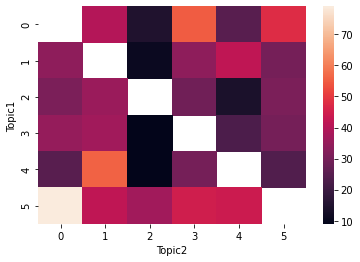

In [54]:
top2 = pd.DataFrame(W1_clean.argsort()[:, 4:][:, ::-1], columns = ['Topic1', 'Topic2'])\
                .groupby(['Topic1', 'Topic2']).size().reset_index(name = 'count')
top2

top2_wide=top2.pivot_table(index='Topic1', columns='Topic2', values='count')
sns.heatmap(top2_wide)

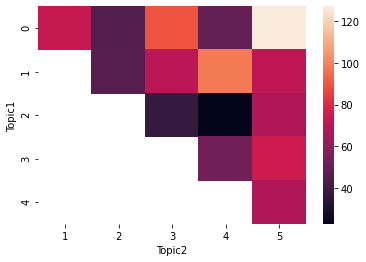

In [53]:
top2 = pd.DataFrame(np.sort(W1_clean.argsort()[:, 4:][:, ::-1]), columns = ['Topic1', 'Topic2'])\
                .groupby(['Topic1', 'Topic2']).size().reset_index(name = 'count')
top2

top2_wide=top2.pivot_table(index='Topic1', columns='Topic2', values='count')
sns.heatmap(top2_wide)

#### Classify calls